# 18.06 Problem Set 7 Solutions

## Problem 1 (5+5+5 points)

**(a)** Consider the $m \times n$ matrix

$$
A = \begin{pmatrix}
        1 & a_1 & a_1^2 & \cdots a_1^{n-1} \\
        1 & a_2 & a_2^2 & \cdots a_2^{n-1} \\
        1 & a_3 & a_3^2 & \cdots a_3^{n-1} \\
        \vdots & \vdots & \vdots & \vdots \\
        1 & a_m & a_m^2 & \cdots a_m^{n-1} \\
    \end{pmatrix}
$$

that we used in class for least-square fitting to polynomials, where $a$ will be a vector of $m$ equally spaced -points from $0$ to $1$.   This is computed in Julia by:
```
a = range(0, 1, length=m)
A = a .^ (0:n-1)'
```
Construct this matrix $A$ for $m = n = 100$, and plot its singular values `svdvals(A)` on a log scale with `using PyPlot, LinearAlgebra; semilogy(svdvals(A)); ylabel(L"\sigma_k"); title("...")` (always label your plots!).

You should observe that the singular values are rapidly decreasing — you could set all but about \_\_\_\_\_\_\_\_\_\_ of them (nearest multiple of 10) and still have nearly the same matrix $A$ to $\sim 16$ decimals places — the matrix $A$ is *nearly* rank \_\_\_\_\_\_\_\_\_\_.

This means that many of the columns of $A$ are nearly linearly **dependent**.  Give a few words of explanation?

**(b)** Suppose that $A$ is an $m \times m$ matrix with $m$ *identical* singular values $\sigma_k = \sigma > 0$.  It follows that $A/\sigma$ must be a \_\_\_\_\_\_\_\_\_\_ (pick *one* of: singular, rank-deficient, projection, unitary, symmetric, uninteresting, diagonal, upper-triangular) matrix because \_\_\_\_\_\_\_\_\_\_.

**(c)** Plot the singular values of the matrix `A = rand(100,100)`, whose entries are random numbers distributed uniformly between 0 and 1.   This matrix is *not* close to rank-deficient, because random columns are very unlikely to be close to linearly dependent, so you should find that none of the singular values are ridiculously small compared to the others.   However, *one* singular value is much bigger that the others.  Why?  As a hint, plot the first 5 singular vectors $v$ with `plot(svd(A).V[:,1:5])` — how is the singular vector for the biggest singular value different from the others?  Maybe think about the best rank-1 approximation to this matrix implied by the SVD.  (A few words of explanation suffice, no proofs required.)

### Solutions:
**(a)** First we plot the singular values of A.

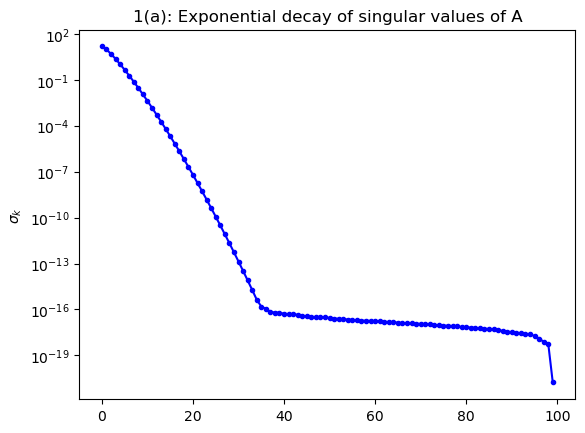

PyObject Text(0.5, 1.0, '1(a): Exponential decay of singular values of A')

In [1]:
m=100
n=100
a = range(0, 1, length=m)
A = a .^ (0:n-1)'

using PyPlot, LinearAlgebra
semilogy(svdvals(A), "b.-")
ylabel(L"\sigma_k")
title("1(a): Exponential decay of singular values of A")

As we can see from the plot, the singular values fall off *exponentially* fast until they hit a "floor" of about `1e-16` arising from the finite precision of computer arithmetic.

We can eyeball the plot, or we can get a precise count of the singular values that are not so tiny:

In [2]:
count(>(1e-16), svdvals(A))

37

That is, you could set all but about **40** of them (nearest multiple of 10) and still have nearly the same matrix  𝐴  to  ∼16  decimals places — the 100x100 matrix  𝐴  is nearly rank **40**.

Why is the matrix so rank deficient?  The low rank means that **most of the columns** are nearly **linearly dependent**.  Why?

We can get a big hint by looking at the last few columns of $A$:

In [3]:
A[:, end-5:end] # last 5 columns of A

100×6 Matrix{Float64}:
 0.0           0.0           0.0           …  0.0           0.0
 2.57212e-188  2.5981e-190   2.62435e-192     2.67763e-196  2.70468e-198
 5.09461e-160  1.02921e-161  2.07922e-163     8.48576e-167  1.71429e-168
 1.8184e-143   5.51031e-145  1.66979e-146     1.53332e-149  4.64644e-151
 1.00909e-131  4.07714e-133  1.64733e-134     2.68924e-137  1.08656e-138
 1.29859e-122  6.55854e-124  3.31239e-125  …  8.44912e-128  4.26723e-129
 3.60171e-115  2.18286e-116  1.32294e-117     4.8593e-120   2.94503e-121
 7.07143e-109  5.0e-110      3.53536e-111     1.7675e-113   1.24975e-114
 1.99871e-103  1.61512e-104  1.30515e-105     8.52255e-108  6.88691e-109
 1.28555e-98   1.16868e-99   1.06243e-100     8.78045e-103  7.98223e-104
 2.57212e-94   2.5981e-95    2.62435e-96   …  2.67763e-98   2.70468e-99
 2.0008e-90    2.22311e-91   2.47013e-92      3.04954e-94   3.38838e-95
 7.13393e-87   8.64719e-88   1.04814e-88      1.53997e-90   1.86663e-91
 ⋮                                      

If you look carefully, you will see that the columns of $A$ are approaching

$$
\begin{pmatrix}
       a_1^k \\
      a_2^k \\
        a_3^k \\
       \vdots \\
        a_m^k \\
    \end{pmatrix}
    \to
    \begin{pmatrix}
        0 \\
        0 \\
      0 \\
       \\
        1 \\
    \end{pmatrix}
$$
as the column number $k$ grows.   The reason for this is simple: most of the entries of each column are $< 1$, so their powers **go to zero**, except for the last entry $a_m = 1$ whose powers are always 1.

So, as we go from left to right in the matrix $A$, the columns are becoming **more and more parallel** to $[0,0,\ldots,0,1]$, which of course means that they are **nearly linearly dependent** and hence the matrix is **nearly low rank**.

(More generally, even if our values $a_j$ did not go from 0 to 1, their powers $a_j^k$ would be dominated by the largest row, so the vectors would still become more and more parallel.)

This is a general problem with such matrices, called "[Vandermonde matrices](https://en.wikipedia.org/wiki/Vandermonde_matrix)", that arise from fitting to combinations of monomials $1,x,x^2,\ldots$.  Monomials turn out to be a terrible way to work with high-degree polynomials, because they represent a *nearly dependent* (called "ill-conditioned") basis.

**(b)** $A/\sigma$  must be an **unitary** matrix.

If all of the singular values are the same, then $\Sigma = \sigma I$ is proportional to the identity matrix, and
$$
A/\sigma = (U\Sigma V^T) / \sigma = (\sigma U V^T) / \sigma = U V^T
$$
But for a square $A$, the $U$ and $V$ are *square* matrices with orthonormal columns, i.e. unitary ($U^{-1}=U^T$ and $V^{-1}=V^T$), and the product of unitary matrices is unitary.  This is easy to check:
$$
A^TA = (U V^T)^T (UV^T) = VU^TUV^T = I
$$
 
**(c)** We first generate a random matrix A and plot its singular values and its first 5 singular vectors. 

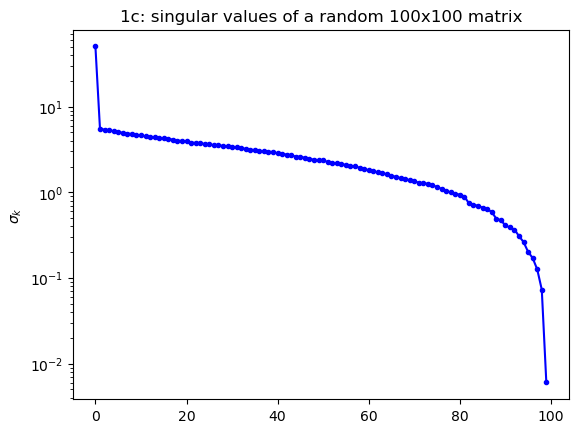

PyObject Text(0.5, 1.0, '1c: singular values of a random 100x100 matrix')

In [4]:
A=rand(100,100)
semilogy(svdvals(A), "b.-")
ylabel(L"\sigma_k")
title("1c: singular values of a random 100x100 matrix")

We can see from the plot that the *first* singular value $\sigma_1$ is about $10\times$ larger than the second-biggest ($\sigma_2$), and after that the values decay very slowly (until the last few).

(Comment: It's very different from problem 1(a) — there are no singular values $< 10^{-3}$ here, and the matrix is *not* approximately low rank.  That shouldn't be surprising: it is very unlikely for random vectors to be nearly linearly dependent, so this matrix will not have a very good low-rank approximation.)

Let's try to get some more insight by plotting the first few left and right singular vectors $u$:

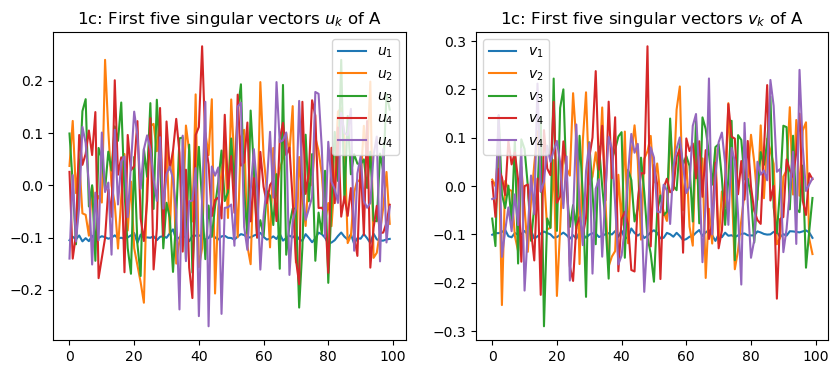

PyObject <matplotlib.legend.Legend object at 0x16f963e20>

In [5]:
figure(figsize=(10,4))
subplot(1,2,1)
plot(svd(A).U[:,1:5])
title(L"1c: First five singular vectors $u_k$ of A")
legend([L"u_1", L"u_2", L"u_3", L"u_4", L"u_4"])

subplot(1,2,2)
plot(svd(A).V[:,1:5])
title(L"1c: First five singular vectors $v_k$ of A")
legend([L"v_1", L"v_2", L"v_3", L"v_4", L"v_4"])

In the plot above, most of ther singular vectors look like random numbers (of either sign), but $v_1$ is special: it is **nearly constant** and **nonzero**, with a value of $\approx 0.1$.

Similarly, we can plot the first several vectors in $V$ and see almost the same thing.

What is the corresponding rank-1 approximation $\sigma_1 u_1 v_1^T$ of $A$?  Let's calculate it:

In [6]:
U,σ,V = svd(A)

# rank-1 approximation
σ[1] * U[:,1] * V[:,1]'

100×100 Matrix{Float64}:
 0.532506  0.514909  0.51515   0.502238  …  0.484983  0.507063  0.566765
 0.498481  0.482008  0.482234  0.470147     0.453994  0.474663  0.53055
 0.523579  0.506277  0.506514  0.493819     0.476853  0.498563  0.557264
 0.485973  0.469913  0.470134  0.45835      0.442603  0.462753  0.517238
 0.54342   0.525462  0.525709  0.512532     0.494924  0.517456  0.578381
 0.512414  0.495481  0.495713  0.483288  …  0.466685  0.487931  0.54538
 0.54149   0.523596  0.523841  0.510711     0.493165  0.515617  0.576327
 0.489051  0.47289   0.473112  0.461253     0.445407  0.465684  0.520514
 0.547046  0.528969  0.529217  0.515952     0.498226  0.520908  0.582241
 0.509381  0.492547  0.492778  0.480427     0.463922  0.485042  0.542152
 0.493541  0.477231  0.477455  0.465488  …  0.449495  0.469959  0.525293
 0.503091  0.486466  0.486694  0.474495     0.458194  0.479054  0.535458
 0.517734  0.500624  0.500859  0.488305     0.471529  0.492996  0.551042
 ⋮                          

We can see that the first singular value/vectors correspond to a **rank-1 approximation that is almost constant ≈ 0.5**.

If you think about this a little, you should realize what is going on: **the rank-1 approximation is (roughly) just the average 0.5** of our random entries in [0,1].  Because our random numbers are **all nonnegative** the **columns are have a large positive correlation** described by this average, which gives us a large singular value.

The remaining singular values just represent the uncorrelated random "leftovers" after we subtract out this average, and hence are much smaller.   (Some statistical analysis shows that they are smaller by a factor of $\sim \sqrt{n}$ for an $n \times n$ matrix, but you were *not* required to do this.)

In fact, we can easily estimate $\sigma_1$, though you were *not* required to do this.  The rank-1 matrix describing the average $0.5$ is
$$
0.5 \times 
\begin{pmatrix}
1 & 1 & \cdots & 1 & 1 \\
1 & 1 & \cdots & 1 & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & 1 & \cdots & 1 & 1
\end{pmatrix} = 0.5 \underbrace{\begin{pmatrix}1 \\ 1 \\ \vdots \\ 1 \end{pmatrix}}_o 
\underbrace{\begin{pmatrix}1 & 1 & \cdots & 1 \end{pmatrix}}_{o^T} = \underbrace{0.5n}_{\approx \sigma_1} \underbrace{\frac{o}{\sqrt{n}}}_{\approx u} \underbrace{\frac{o^T}{\sqrt{n}}}_{\approx v^T}
$$
where $o$ is the vector of $n$ 1's (as in class) and we normalize it by a factor of $\sqrt{n}$ to get the unit-length vectors $u,v$.  (Note that we could also choose $u,v = -o/\sqrt{n}$ — there is a sign ambiguity in the singular vectors — and Julia above made this negative sign choice.)   Hence the first singular value $\sigma_1$ should be about $n/2 = 100/2 = 50$, and indeed this is what we get:

In [7]:
σ[1] # about n/2 = 50

50.36849466742757

## Problem 2 (9+6 points)

**(a)** Apply Gram-Schmidt to the polynomials ${1, x, x^2}$ to find an orthonormal basis ${q_1,q_2,q_3}$ of polynomials under the inner ("dot") product (*different* from the one used in class):
$$
f \cdot g = \int_0^\infty f(x) g(x) e^{-x} dx
$$
(Unlike the Legendre polynomials in class, normalize your polynomials $q_k$ to have $\Vert q_k \Vert = \sqrt {q_k \cdot q_k} = 1$ under this inner product, i.e. to be really ortho*normal*.)

* The [following integral](https://en.wikipedia.org/wiki/Gamma_function) will be useful: $\int_0^\infty x^n e^{-x} dx = n!$ ($n$ [factorial](https://en.wikipedia.org/wiki/Factorial)) for any integer $n \ge 0$.

**(b)** Consider the function $f(x) = \begin{cases} x & x < 1 \\ 0 & x \ge 1 \end{cases}$.  Find the *degree-1 polynomial p(x)=αx+β* that is the "best fit" to $f(x)$ in the sense of minimizing
$$
\Vert f - \alpha x - \beta \Vert^2 = \int_0^\infty \left[ f(x) - p(x) \right]^2 e^{-x} dx
$$
In particular, find $p(x)$ by performing the orthogonal projection (with this dot product) of $f(x)$ onto .........?

### Solutions
**(a)** Let $a_1, a_2, a_3$ be the polynomials defined by $a_1(x)=1, a_2(x)=x, a_3(x)=x^2$. Now we perform Gram-Schmidt to the basis $\{a_1, a_2, a_3\}$ of the space of degree $\leq 3$ polynomials using the provided inner product. Following the notations from the lecture, we have
\begin{align*}
r_{11}^2&=\|a_1\|^2=\int_0^\infty e^{-x} dx = 1 \quad \text{ the integration follows from the provided formula}\\
q_1&=\frac{a_1}{r_{11}}=a_1 \quad \text{ normalization}\\
r_{12}&=q_1\cdot a_2 = \int_0^\infty xe^{-x}dx=1 \\
v_2&= a_2-r_{12}q_1 = a_2-q_1=x-1 \quad \text{ projection of $a_2$ onto the orthogonal complement of Span}(q_1)\\
r_{22}^2&= \|v_2\|^2=\int_0^\infty (x^2-2x+1)e^{-x}dx = 1\\
q_2&= \frac{v_2}{r_{22}}=x-1 \quad \text{ normalization}\\
r_{13}&=q_1 \cdot a_3 = \int_0^\infty x^2e^{-x} dx = 2 \\
r_{23}&=q_2 \cdot a_3 = \int_0^\infty (x-1)x^2 e^{-x} dx = 4\\
v_3&= a_3-r_{13}q_1 - r_{23}q_2 = x^2-2-4(x-1)=x^2-4x+2 \quad \text{ projection of $a_3$ onto the orthogonal complement of Span}(q_1, q_2)\\
r_{33}^2&=\|v_3\|^2=\int_0^\infty (x^2-4x+2)^2 e^{-x} dx = \int_0^\infty (x^4 -8x^3 + 20x^2 -16x + 4)e^{-x}dx =4\\
q_3&=\frac{v_3}{r_{33}}=\frac{x^2-4x+2}{2} \quad \text{ normalization}
\end{align*}
To summarize,
$$\boxed{q_1(x)=1,\quad q_2(x)=x-1,\quad q_3(x)= \frac{x^2-4x+2}{2}}.$$

It turns out that these polynomials are quite famous and useful.  With a slightly different normalization, they are called [Laguerre polynomials](https://en.wikipedia.org/wiki/Laguerre_polynomials).

**(b)** The best degree-1 polynomial fit of $f(x)$ is its orthogonal projection onto **Span($q_1, q_2$)**. Now we do this projection. 
\begin{align*}
p&=(q_1\cdot f)q_1+(q_2\cdot f)q_2\\
 &=\left(\int_0^\infty f(x)e^{-x} dx\right)1 + \left(\int_0^\infty (x-1)f(x) e^{-x} dx\right)(x-1)\\
 &=\int_0^1 xe^{-x} dx + \left(\int_0^1 (x^2-x)e^{-x} dx\right)(x-1)\\
 &=(-xe^{-x}-e^{-x})\vert_0^1 + \left((-x^2e^{-x}-xe^{-x}-e^{-x})\vert_0^1\right) (x-1)\\
 &=1-2e^{-1} + (1-3e^{-1})(x-1)\\
 &=\boxed{e^{-1}+(1-3e^{-1})x}.
\end{align*}
The integrals here require a bit of integration by parts (or you can use something like WolframAlpha).

## Problem 3 (5+5+5 points)

In a common variant of least-squares fitting called "ridge" or "Tikhonov" regression to get more robust solutions to noisy fitting problems, one minimizes:
$$
f(x) = \Vert b - Ax \Vert^2 + \alpha \Vert x \Vert^2
$$
instead of just $\Vert b - Ax \Vert^2$, for some "penalty" parameter $\alpha \ge 0$.  As $
\alpha$ gets bigger and bigger, this favors *smaller* solutions $x$.   Here, $A$ is $m \times n$.

**(a)** Write this *same* $f(x)$ as $f(x) = \Vert c - Bx \Vert^2$ for some matrix $B$ and some vector $c$ defined in terms of $A,\alpha,b$.   Hint: $\Vert x \Vert^2 + \Vert y \Vert^2$ equals the length² of a single vector \_\_\_\_\_\_ made by stacking $x$ and $y$.

**(b)** Since part (a) rewrote $f(x)$ as an ordinary-looking least-squares problem, use the normal equations for $B$ and $c$ to write down an equation $(n\times n \mbox{ matrix})\hat{x} = (\mbox{right-hand side})$ for the minimizer $\hat{x}$ in terms of $A,\alpha,b$.

**(c)** For $\alpha > 0$, show that (b) has a *unique* solution even if $A$ is *not* full column rank (i.e. $A^TA$ is singular).   In particular, why does your matrix on the left-hand-side have a nullspace of {0}?

A really common strategy in mathematics is to try to rewrite new problems so that they look like old problems, letting us re-use the old solutions!

### Solutions
**(a)** $\Vert x \Vert^2 + \Vert y \Vert^2$ equals the length² of a single vector $\boxed{\binom{x}{y}}$ made by stacking $x$ and $y$. So
$$\| b - Ax \|^2 + \alpha \| x \|^2 = \left\|\begin{matrix} b-Ax \\ -\sqrt{\alpha}x \end{matrix}\right\|^2 =\left\|\begin{pmatrix} b \\ 0 \end{pmatrix} - \begin{pmatrix} Ax \\ \sqrt{\alpha}x \end{pmatrix}\right\|^2 =\left\|\begin{pmatrix} b \\ 0 \end{pmatrix} - \begin{pmatrix} A \\ \sqrt{\alpha}I_n \end{pmatrix}x\right\|^2$$
where $I_n$ denotes the $n \times n$ identity matrix. So we can take
$$\boxed{c=\begin{pmatrix} b \\ 0 \end{pmatrix},\ B=\begin{pmatrix} A \\ \sqrt{\alpha}I_n \end{pmatrix}}$$

**(b)** The normal equation for $B$ and $c$ is $(B^TB)\hat{x}=B^Tc$. Writing this out in terms of $A, a, b$, we get
$$\boxed{(A^TA+\alpha I_n)\hat{x}=A^Tb}.$$

**(c)** There are several ways to approach this.

One is simply to look at the the matrix $B$.  For $\alpha > 0$, by inspection it must have **full column rank** since the columns of $I_n$ are independent.  (This is true even if $A = 0$!  All that matters is that the last $n$ rows form independent columns.)  So $N(B) = N(B^T B) = N(A^TA+\alpha I_n) = \{ \vec{0} \}$ and the normal equations have unique solutions.

Alternatively, we can analyze $N(A^TA+\alpha I_n)$ directly, similarly to how we analyzed $N(A^T A)$ in class.  Suppose that $x\in N(A^TA+\alpha I_n)$, i.e. $(A^TA+\alpha I_n)x=0$. Multiply both sides on the left by $x^T$, we get
$$0=x^T(A^TA+\alpha I_n)x=\|Ax\|^2+\alpha\|x\|^2.$$
(where the first term is similar to what we got in class).
Since $\alpha>0$ and the norms $\Vert \cdots \Vert^2$ are $\ge 0$, the only way that summing three non-negative terms can give zero is if they are all zero, i.e. $\|Ax\|=\|x\|=0$, which implies $x=\vec{0}$. Hence $N(A^TA+\alpha I_n)= \{ \vec{0} \}$.

## Problem 4 (2+2+2+2 points)

Suppose we have an $m \times 3$ matrix $A = \begin{pmatrix} a_1 & a_2 & a_3 \end{pmatrix}$ (of rank 3), and we do Gram-Schmidt to obtain a matrix $Q = \begin{pmatrix} q_1 & q_2 & q_3 \end{pmatrix}$, or equivalently the QR factorization $A = QR$.  In the following questions, **simplify your answers as much as possible** (in terms of the given matrices and/or vectors).

**(a)** What is $Q^T A$?

**(b)** If $P_Q$ is the projection matrix onto $C(Q)$, what is $P_Q A$?

**(c)** If $P_A$ is the projection matrix onto $C(A)$, what is $P_A Q$?

**(d)** What is $P_Q B$ where $B = \begin{pmatrix} 2a_1 & 3q_2 & 4a_3-q_1 \end{pmatrix}$?

### Solutions
**(a)** Since $Q$ is orthonormal, we have $Q^TQ=I$, and $Q^TA=Q^TQR=\boxed{R}$.

**(b)** Recall that $C(Q)=C(A)$: the whole point of QR / Gram-Schmidt is to obtain an orthonormal basis for the *same* space. In particular, $a_1, a_2, a_3\in C(Q)$. So for $i=1,2,3$, the projection of $a_i$ onto $C(Q)$ is just itself. This implies $P_QA=\boxed{A}$.

We can also compute this explicitly, of course: $P_Q = QQ^T$, so $P_Q A = QQ^T QR = QR = A$.  But it is good to step back from blind computation and realize *why* this is the case.

**(c)** For the same reason as above, we have $P_AQ=\boxed{Q}$.   Indeed, $P_A = P_Q$ since they are projections onto the same space.

Again, we could do this by blind computation: $P_A = A(A^T A)^{-1} A^T = QR(R^T Q^T Q R)^{-1} R^T Q^T = QR(R^T R)^{-1}R^T Q^T = QR R^{-1} (R^T)^{-1} R^T Q^T = QQ^T = P_Q$, using the fact that $R$ is square and invertible.  Hence $P_A Q = P_Q Q = QQ^T Q = Q$.  But again, it is better to step back and understand *what* we are doing, and what these projections represent, than to blindly chug through formulas.

**(d)** Since $C(A)=C(Q)$, we have $2a_1\in C(A)=C(Q)$ and $4a_3 \in C(A)=C(Q)$, so all columns of $B$ are in $C(Q)$ and $P_QB=\boxed{B}$.

## Problem 5 (5+5 points)

The $3 \times 3$ matrix $A = \begin{pmatrix} a & b & c \\ d & e & f \\ g & h & i \end{pmatrix}$ has the QR factorization
$$
A = Q \begin{pmatrix} r_{11} & r_{12} & r_{13} \\ & r_{22} & r_{23} \\ & & r_{33} \end{pmatrix}
$$

**(a)** Give a formula for $r_{11}$ in terms of $a,b,c,d,e,f,g,h,i$ (but not any of the elements of $Q$).

**(b)** Solve for the vector $x$ in the equation
$$
Q^T x = \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}
$$
in terms of $a,b,c,d,e,f,g,h,i$.

### Solutions
**(a)** Recall that the entries of $R$ are just the scalar coefficients computed during Gram-Schmidt orthogonalization of the columns of $A$, and in particular $r_{11}$ is just the **length of the first column** $a_1$ that we divide by to normalize $q_1 = a_1 / \Vert a_1 \Vert = a_1 / r_{11}$.  So, 
$\boxed{r_{11}=\|a_1\|=\sqrt{a^2+d^2+g^2}}$.

**(b)** $Q^T x$ computes the coefficients of $x$ in the $Q = \begin{pmatrix} q_1 & q_2 & q_3 \end{pmatrix}$ basis for $\mathbb{R}^3$.  If this is $1,0,0$, it means that $x = 1q_1 + 0q_2 + 0q_3 = q_1$.   But $q_1$, from Gram–Schmidt, is just the first column of $A$ divided by its length $r_1$, i.e.
$$
\boxed{x = q_1 =  \frac{a_1}{r_{11}}=\frac{1}{\sqrt{a^2+d^2+g^2}} \begin{pmatrix} a\\ d\\ g\end{pmatrix} }.$$

Equivalently, since $Q$ is square it is unitary, so $Q^T = Q^{-1}$, and we can multiply both sides by $Q$ to obtain:
$$
Q Q^T x = x = Q \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} \, ,
$$
from which we can see that $x$ is the first column of $Q$, i.e. $q_1$.